In [2]:
import sys
import os
import cv2 as cv

import matplotlib.pyplot as plt

from skimage.feature import local_binary_pattern

In [3]:
sys.path.append(os.path.join(os.path.dirname(os.getcwd()),"modules"))

In [4]:
import NbrRegionSegment as seg


In [5]:
img = cv.imread("../Dataset/" + "Case_3_A12-37374-17669" + ".jpg")

In [16]:
# img = cv.resize(img, (0,0), fx = 0.5, fy = 0.5)

In [17]:
# img = cv.medianBlur(img, 3)

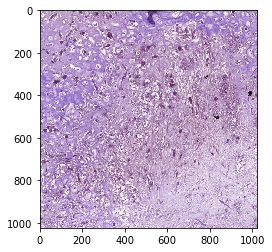

In [6]:
plt.imshow(img)

In [7]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


In [8]:
#LBP part
radius = 1
points = 8*radius 

lbp = local_binary_pattern(gray_img, points, radius, "uniform").astype("uint8")

print(lbp)

[[3 3 3 ... 9 2 0]
 [4 4 4 ... 6 5 1]
 [4 4 5 ... 4 9 2]
 ...
 [0 8 6 ... 7 8 9]
 [3 9 2 ... 5 5 1]
 [3 4 2 ... 2 1 3]]


In [21]:
# r1, r2 = seg.RegionExtract(img, lbp, 30, 5.12561905e-01, 1.17403947e-01, 8.39755087e-01, True)
# r = seg.RemoveBG(img, lbp, 30, 1000, 5.12561905e-01, 1.17403947e-01, 8.39755087e-01, True)


In [22]:
# plt.imshow(r)

In [23]:
# r2.shape

In [24]:
# seg.GetAllSegVariance(gray_img, r1, r2.shape[0], True)

In [10]:
r1, r2 =  seg.SegmentImage(img, lbp,23.172919882120993, 0.09287508260747025, 0.033431774097799016, 0.6505564900560017)
plt.imshow(r1)

TypeError: Invalid shape (44912,) for image data

In [25]:
arr = []
reg= []
for i in range(10, 50, 5):
    r1, r2 = seg.RegionExtract(img, lbp, i, 5.12561905e-01, 1.17403947e-01, 1,)

    a, b = seg.GetAllSegVariance(gray_img, r1, r2.shape[0])
    reg.append(r2.shape[0])
    print(a, b, a+b)
    arr.append([a, b])

8.25998722575605e-06 1.1291579008102417 1.1291661607974675
8.354671444976702e-05 0.9637724161148071 0.9638559628292569
0.0003616891335695982 0.8596997857093811 0.8600614748429507
0.0013831458054482937 0.8596084117889404 0.8609915575943887
0.005095926113426685 0.8817192912101746 0.8868152173236012
0.01663440465927124 0.9133380055427551 0.9299724102020264
0.047521863132715225 0.952424168586731 0.9999460317194462
0.12237273901700974 0.9635353684425354 1.0859081074595451


In [16]:
import numpy as np

In [17]:
arr = np.array(arr)

In [18]:
reg = np.array(reg)

In [19]:
calc = (1024/reg)**1.8

In [19]:
calc

array([3.09660880e-03, 1.22581214e-02, 4.51239909e-02, 1.75317092e-01,
       8.21752313e-01, 3.63407524e+00, 1.56712835e+01, 9.41184980e+01])

In [20]:
arr[:, 0] + arr[:, 1]

array([1.91858262, 1.55477297, 1.28118369, 1.17205919, 1.13580923,
       1.1060724 , 1.16373129, 1.06290368])

In [21]:
f = 1
arr[:, 0]*f

array([0.61309475, 0.32491732, 0.16815206, 0.08117343, 0.03497295,
       0.01540026, 0.00684913, 0.00253646])

In [22]:
arr[:, 1]

array([1.30548787, 1.22985566, 1.11303163, 1.09088576, 1.10083628,
       1.09067214, 1.15688217, 1.06036723])

In [49]:
np.log(reg)

array([10.14116497,  9.37678658,  8.65277249,  7.89878236,  7.04053639,
        6.2146081 ,  5.40267738,  4.40671925])

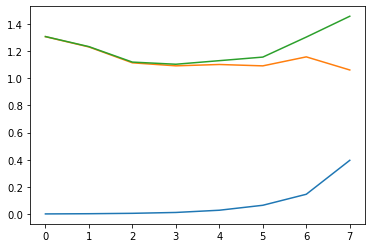

In [60]:
f = 1024*1024*1024/(reg)
f2 = 1
plt.plot(arr[:, 0]*f)
plt.plot(arr[:, 1]*f2)
plt.plot(arr[:, 1]*f2 + arr[:, 0]*f)